In [12]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.cloud import storage
import statistics as st
from io import StringIO
from google.cloud import bigquery

In [13]:
%%bigquery
SELECT * FROM `axial-silicon-335007.data_123.python`

Downloading: 100%|██████████| 7043/7043 [00:01<00:00, 5956.06rows/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9732-OUYRN,Female,0,True,False,49,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),19.00,918.7,False
1,0661-KQHNK,Female,0,True,True,6,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),19.00,105.5,False
2,4709-LKHYG,Female,0,True,True,29,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Electronic check,20.00,540.05,False
3,9824-QCJPK,Male,0,True,False,36,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,666.75,False
4,4716-MRVEN,Female,0,False,False,29,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,599.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5883-GTGVD,Male,0,False,False,19,True,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,True,Electronic check,99.95,1931.75,True
7039,5502-RLUYV,Female,0,True,True,69,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,103.95,7446.9,True
7040,3001-UNBTL,Male,1,True,True,29,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,103.95,2964.8,False
7041,5760-IFJOZ,Male,0,False,False,3,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,False,Mailed check,107.95,313.6,False


In [14]:
%%bigquery
SELECT * FROM `axial-silicon-335007.data_123.python` where gender like 'M%'

Downloading: 100%|██████████| 3555/3555 [00:01<00:00, 2581.66rows/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9824-QCJPK,Male,0,True,False,36,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,666.75,False
1,4323-ELYYB,Male,0,True,True,13,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,218.55,False
2,1269-FOYWN,Male,0,True,True,44,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Bank transfer (automatic),20.00,860.85,False
3,1401-FTHFQ,Male,0,True,True,23,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,True,Credit card (automatic),20.00,445.3,False
4,6814-ZPWFQ,Male,1,False,False,51,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Bank transfer (automatic),25.00,1260.7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,1571-SAVHK,Male,0,False,False,12,True,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,True,Mailed check,99.95,1132.75,True
3551,5883-GTGVD,Male,0,False,False,19,True,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,True,Electronic check,99.95,1931.75,True
3552,3001-UNBTL,Male,1,True,True,29,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,103.95,2964.8,False
3553,5760-IFJOZ,Male,0,False,False,3,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,False,Mailed check,107.95,313.6,False


In [15]:
%%bigquery
SELECT * FROM `axial-silicon-335007.data_123.python` where tenure >50

Downloading: 100%|██████████| 2105/2105 [00:01<00:00, 1907.74rows/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6814-ZPWFQ,Male,1,False,False,51,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Bank transfer (automatic),25.00,1260.7,False
1,9830-ECLEN,Male,0,True,True,58,False,No phone service,DSL,Yes,...,Yes,No,Yes,No,One year,False,Mailed check,50.00,2919.85,False
2,6229-UOLQL,Male,0,True,True,56,False,No phone service,DSL,Yes,...,No,Yes,Yes,No,One year,True,Mailed check,52.00,2884.9,False
3,3605-JISKB,Male,1,True,False,55,True,Yes,DSL,Yes,...,No,No,No,No,One year,False,Credit card (automatic),60.00,3316.1,False
4,1088-CNNKB,Male,0,True,False,63,True,Yes,DSL,Yes,...,Yes,Yes,No,Yes,One year,False,Credit card (automatic),80.00,5040.2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,6211-WHMYA,Female,1,False,False,64,False,No phone service,DSL,No,...,No,Yes,Yes,No,Month-to-month,True,Electronic check,43.85,2751,False
2101,8548-AWOFC,Male,0,True,False,66,True,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,False,Electronic check,63.85,4264.6,False
2102,9943-VSZUV,Male,1,False,False,67,True,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,True,Mailed check,75.70,5060.85,False
2103,7821-DPRQE,Male,0,True,False,68,True,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,True,Electronic check,107.70,7320.9,False


In [16]:
%%bigquery
SELECT * FROM `axial-silicon-335007.data_123.python` where paymentMethod='Mailed check' or paymentMethod='Electronic check'


Downloading: 100%|██████████| 3977/3977 [00:01<00:00, 3663.91rows/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4709-LKHYG,Female,0,True,True,29,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Electronic check,20.00,540.05,False
1,9824-QCJPK,Male,0,True,False,36,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,666.75,False
2,4716-MRVEN,Female,0,False,False,29,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,599.3,False
3,8084-OIVBS,Female,0,False,False,11,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,211.95,False
4,4323-ELYYB,Male,0,True,True,13,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,218.55,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,5883-GTGVD,Male,0,False,False,19,True,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,True,Electronic check,99.95,1931.75,True
3973,5502-RLUYV,Female,0,True,True,69,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,103.95,7446.9,True
3974,3001-UNBTL,Male,1,True,True,29,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,103.95,2964.8,False
3975,5760-IFJOZ,Male,0,False,False,3,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,False,Mailed check,107.95,313.6,False


In [17]:
%%bigquery
SELECT * FROM `axial-silicon-335007.data_123.python` order by tenure

Downloading: 100%|██████████| 7043/7043 [00:01<00:00, 6632.15rows/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2923-ARZLG,Male,0,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,,False
1,2520-SGTTA,Female,0,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,,False
2,3115-CZMZD,Male,0,False,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,,False
3,4367-NUYAO,Male,0,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,,False
4,2775-SEFEE,Male,0,False,True,0,True,Yes,DSL,Yes,...,No,Yes,No,No,Two year,True,Bank transfer (automatic),61.90,,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7663-YJHSN,Female,0,True,False,72,True,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),103.95,7556.9,False
7039,9958-MEKUC,Male,0,True,True,72,True,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,False,Credit card (automatic),103.95,7517.7,False
7040,2193-SFWQW,Male,0,True,True,72,True,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,False,Bank transfer (automatic),111.95,8033.1,False
7041,9481-IEBZY,Male,1,True,False,72,True,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,True,Credit card (automatic),112.90,8061.5,False


In [18]:
%%bigquery
SELECT * FROM `axial-silicon-335007.data_123.python` order by tenure desc

Downloading: 100%|██████████| 7043/7043 [00:00<00:00, 8148.49rows/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5168-MQQCA,Female,0,True,False,72,True,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,True,Bank transfer (automatic),108.50,8003.8,False
1,5985-BEHZK,Female,1,True,False,72,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,False,Credit card (automatic),105.00,7578.05,False
2,3339-EAQNV,Male,1,True,False,72,True,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,True,Credit card (automatic),97.25,7133.1,False
3,3886-CERTZ,Female,0,True,False,72,True,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,True,Electronic check,109.25,8109.8,True
4,8999-XXGNS,Female,1,True,False,72,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,True,Credit card (automatic),105.75,7629.85,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5709-LVOEQ,Female,0,True,True,0,True,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,,False
7039,4472-LVYGI,Female,0,True,True,0,False,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),52.55,,False
7040,4075-WKNIU,Female,0,True,True,0,True,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,False,Mailed check,73.35,,False
7041,3213-VVOLG,Male,0,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,,False


In [19]:
%%bigquery
SELECT * FROM `axial-silicon-335007.data_123.python` WHERE Churn IS NULL

Query complete after 0.00s: 100%|██████████| 1/1 [00:00<00:00, 450.37query/s]                          
Downloading: 0rows [00:01, ?rows/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
%%bigquery
SELECT MIN(MonthlyCharges) AS SmallestPrice from`axial-silicon-335007.data_123.python` 

Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.20rows/s]


,SmallestPrice
0,18.25


In [21]:
%%bigquery
SELECT Max(MonthlyCharges) AS LargestPrice from`axial-silicon-335007.data_123.python`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.05s/rows]


,LargestPrice
0,118.75


In [22]:
%%bigquery
SELECT SUM(MonthlyCharges) AS Sum from`axial-silicon-335007.data_123.python`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.22s/rows]


,Sum
0,456116.6


In [23]:
%%bigquery
SELECT AVG(MonthlyCharges) AS Average from`axial-silicon-335007.data_123.python`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.08s/rows]


,Average
0,64.761692


In [24]:
%%bigquery
SELECT COUNT(MonthlyCharges) AS Count from`axial-silicon-335007.data_123.python`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.19s/rows]


,Count
0,7043


In [25]:
client=storage.Client()
bucket=client.get_bucket("dataset_5399")
blob=bucket.get_blob(f"DATASET.csv")
bt=blob.download_as_string()
# print(bt)
s=str(bt,"utf-8")
s=StringIO(s)
df=pd.read_csv(s)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,NaN,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
bigquery_client = bigquery.Client()
QUERY="""
SELECT*FROM `axial-silicon-335007.data_123.python` 
"""
query_job=bigquery_client.query(QUERY)
df=query_job.to_dataframe()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9732-OUYRN,Female,0,True,False,49,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),19.0,918.7,False
1,0661-KQHNK,Female,0,True,True,6,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),19.0,105.5,False
2,4709-LKHYG,Female,0,True,True,29,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Electronic check,20.0,540.05,False
3,9824-QCJPK,Male,0,True,False,36,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.0,666.75,False
4,4716-MRVEN,Female,0,False,False,29,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.0,599.3,False


In [27]:
df.rename(columns = {'customerID':'CustomerID'}, inplace = True)
print(df) 

      CustomerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     9732-OUYRN  Female              0     True       False      49   
1     0661-KQHNK  Female              0     True        True       6   
2     4709-LKHYG  Female              0     True        True      29   
3     9824-QCJPK    Male              0     True       False      36   
4     4716-MRVEN  Female              0    False       False      29   
...          ...     ...            ...      ...         ...     ...   
7038  5883-GTGVD    Male              0    False       False      19   
7039  5502-RLUYV  Female              0     True        True      69   
7040  3001-UNBTL    Male              1     True        True      29   
7041  5760-IFJOZ    Male              0    False       False       3   
7042  2081-VEYEH    Male              0    False       False       3   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
0            True            No              No  No intern

In [28]:
df.loc[1:5, ['CustomerID', 'PhoneService', 'PaperlessBilling']]


,CustomerID,PhoneService,PaperlessBilling
1,0661-KQHNK,True,False
2,4709-LKHYG,True,False
3,9824-QCJPK,True,False
4,4716-MRVEN,True,False
5,8084-OIVBS,True,False


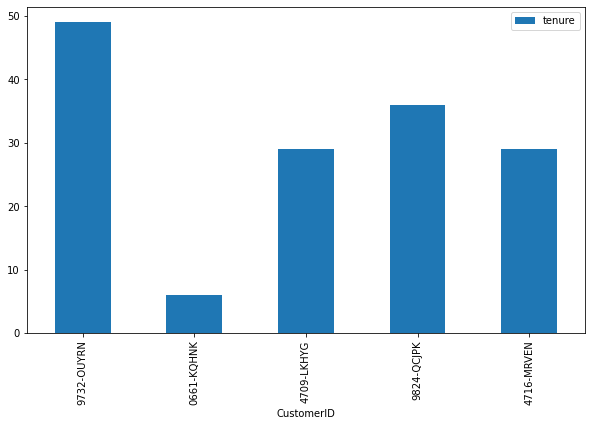

In [29]:
dataFrame = pd.DataFrame(df.head(), columns=["CustomerID","tenure"])
dataFrame.plot(x="CustomerID", y="tenure", kind="bar", figsize=(10, 6))
plt.show()

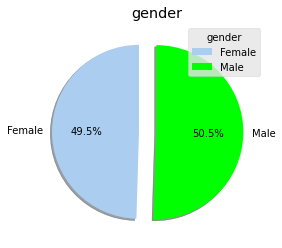

In [30]:
Female = df.loc[df['gender'] == 'Female'].count()[0]
Male = df.loc[df['gender'] == 'Male'].count()[0]
#plt.pie([yes, no])
plt.style.use('ggplot')
labels = ['Female', 'Male']
colors = ['#abcdef', '#00FF00']
explode=[0.2,0]
plt.pie([Female, Male], labels = labels, autopct='%1.1f%%', colors =colors,startangle=90,explode=explode,shadow=True)
plt.title('gender')
plt.legend(title="gender")
plt.show()

<AxesSubplot:>

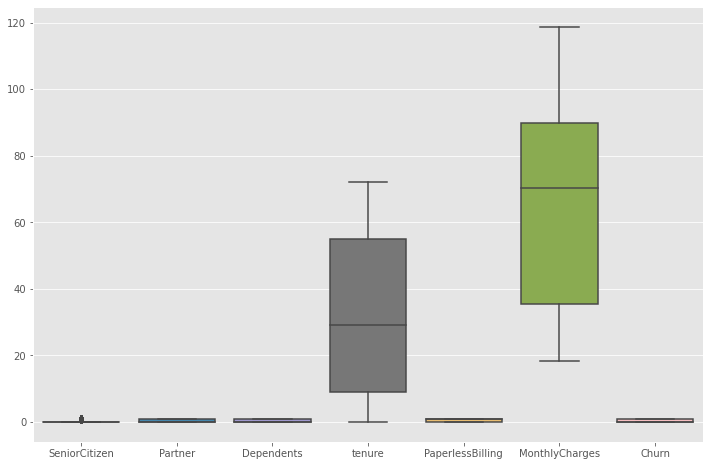

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

<AxesSubplot:>

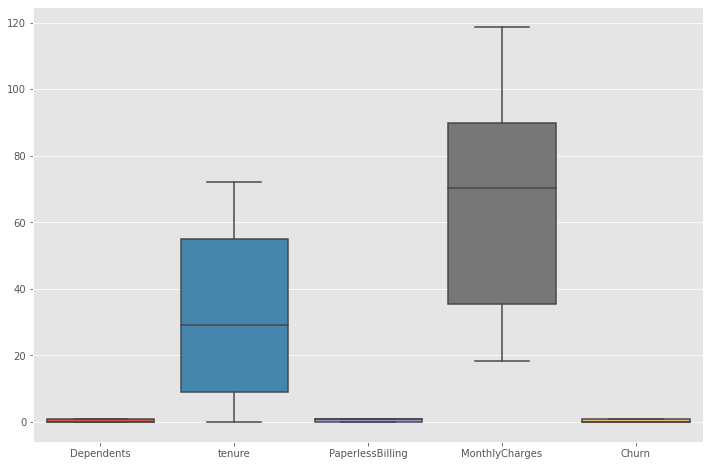

In [38]:
plt.figure(figsize=(12,8))
stats_df = df.drop(['TotalCharges', 'SeniorCitizen', 'Partner'], axis=1)
sns.boxplot(data=stats_df)
